In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [8]:
import matplotlib 
font = {'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
def maxVal(d):
    
    a = 4.3e6 # Velocity = a * d (Hz)
    
    wV = 5e-5 # Width of AP in time (seconds)
    
    Vp = 0.05 # Height of AP (Volts)
    
    PhiP = 1000 # Height of sensitivity function (Volts/Amp)
    
    sigma = 1/0.7 # Axial conductivity (S/m)
    
    wPhi = 0.001 # Width of sensitivity function (m)
    
    
    maxval = a * d**3 *PhiP * np.pi * Vp * wPhi * wV * sigma / ( 2*np.exp(3/2)*(wPhi**2 +a**2*d**2*wV**2)**(3/2) )
    
    return maxval

<IPython.core.display.Javascript object>


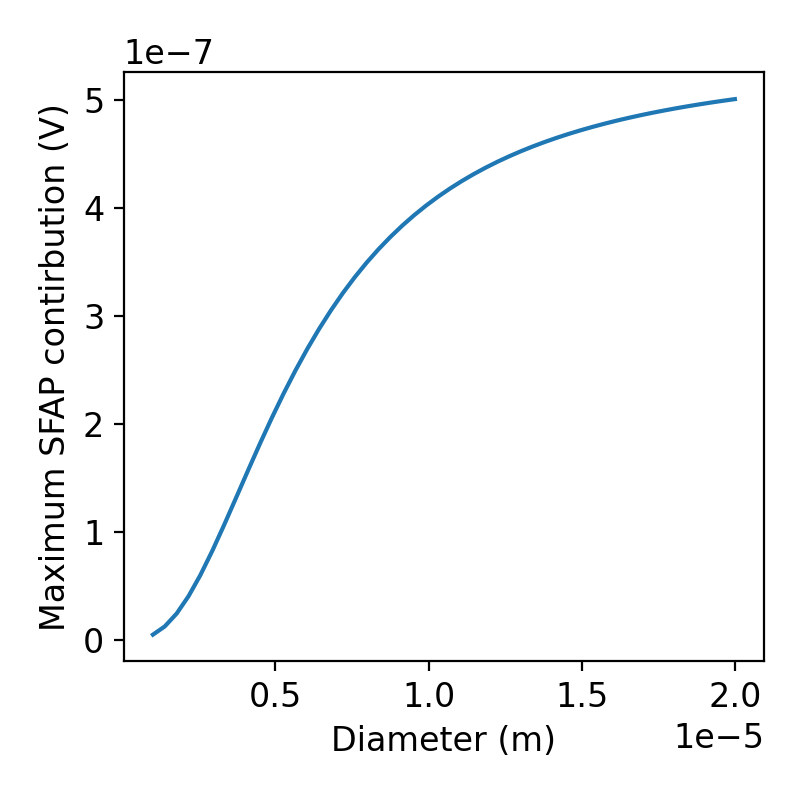

In [65]:
d = np.linspace(1e-6,20e-6)
plt.figure(figsize=(4,4))
plt.plot(d,maxVal(d))
plt.xlabel('Diameter (m)')
plt.ylabel('Maximum SFAP contirbution (V)')
plt.tight_layout()

In [46]:
def maxValU(d):
    
    a = 465 # Velocity = a * sqrt(d) (m^.5 Hz)
    
    wV = 2e-4 # Width of AP in time (seconds)
    
    Vp = 0.06 # Height of AP (Volts)
    
    PhiP = 1000 # Height of sensitivity function (Volts/Amp)
    
    sigma = 1 # Axial conductivity (S/m)
    
    wPhi = 0.001 # Width of sensitivity function (m)
    
    
    maxval = a * d**(5/2) *PhiP * np.pi * Vp * wPhi * wV * sigma / ( 2*np.exp(3/2)*(wPhi**2 + a**2 * d * wV**2)**(3/2) )
    
    return maxval

<IPython.core.display.Javascript object>


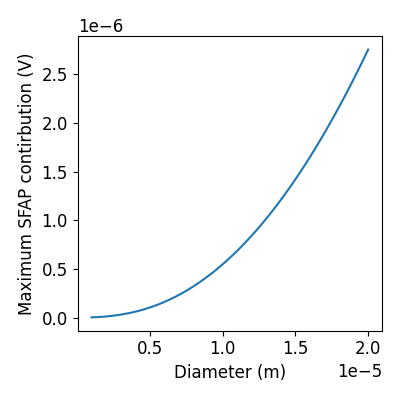

In [47]:
d = np.linspace(1e-6,20e-6)
plt.figure(figsize=(4,4))
plt.plot(d,maxValU(d))
plt.xlabel('Diameter (m)')
plt.ylabel('Maximum SFAP contirbution (V)')
plt.tight_layout()

In [51]:
timeMyelin = np.linspace(0,0.002,2000)
timeUnmyelin = np.linspace(0,0.1,2000)
myelinatedSeparate = np.genfromtxt('capMyelinSeparate.dat')
myelinatedTogether = np.genfromtxt('capMyelinTogether.dat')
unmyelinatedSeparate = np.genfromtxt('capUnmyelinSeparate.dat')
unmyelinatedTogether = np.genfromtxt('capUnmyelinTogether.dat')

<IPython.core.display.Javascript object>


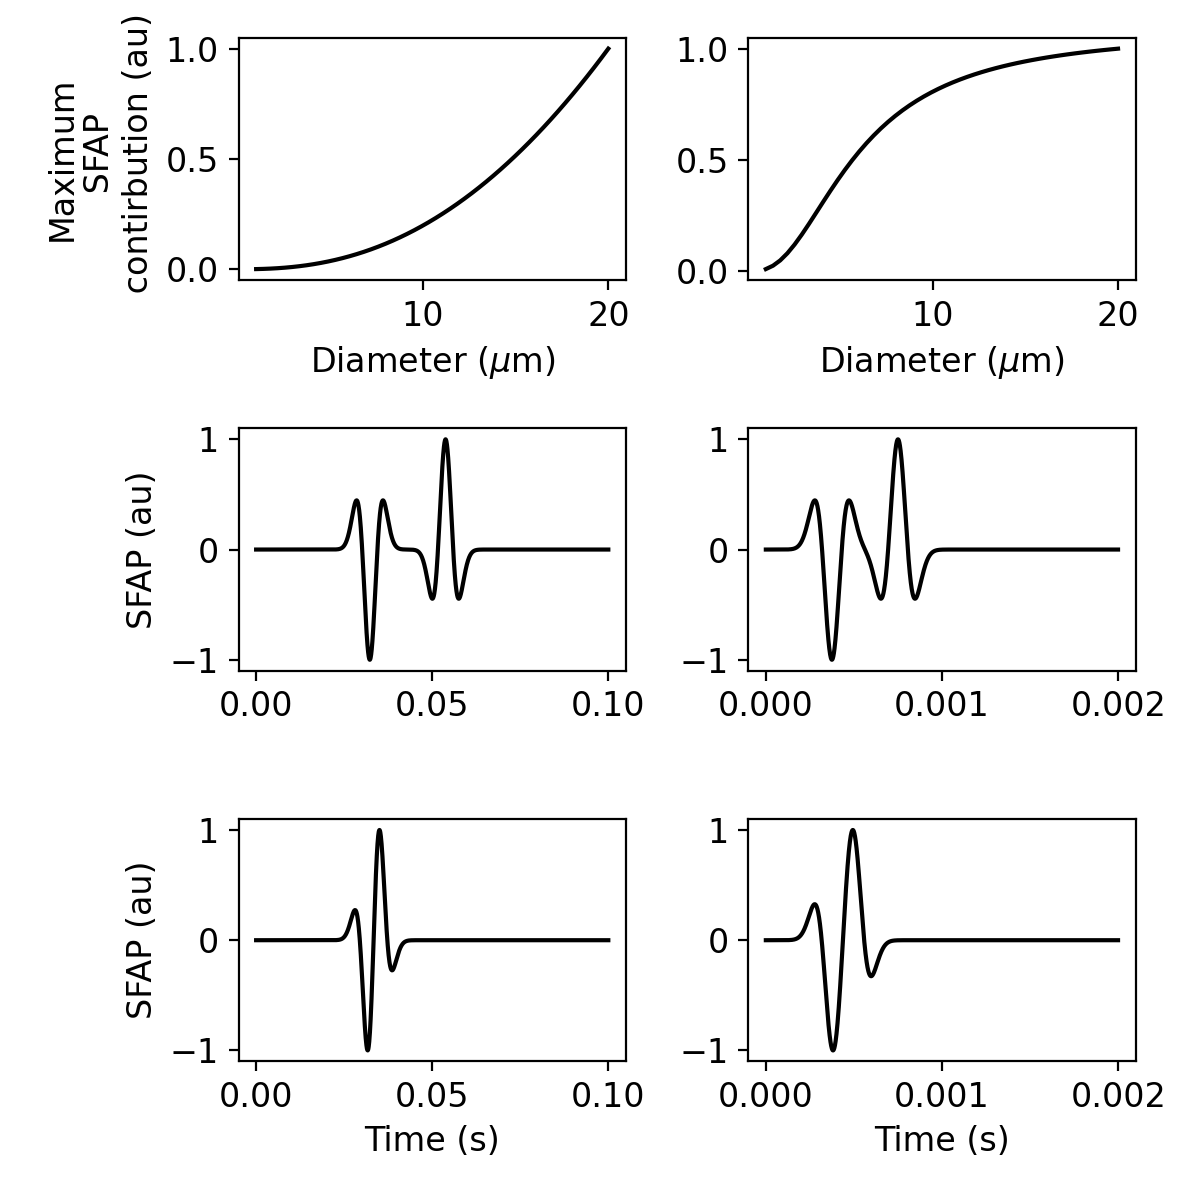

In [76]:
plt.figure(figsize=(6,6))

plt.subplot(3,2,2)
plt.plot(d*1e6,maxVal(d)/np.max(maxVal(d)),'k')
plt.xlabel('Diameter ($\mu$m)')


plt.subplot(3,2,1)
plt.plot(d*1e6,maxValU(d)/np.max(maxValU(d)),'k')
plt.xlabel('Diameter ($\mu$m)')
plt.ylabel('Maximum\n SFAP\n contirbution (au)')

plt.subplot(3,2,4)
plt.plot(timeMyelin,myelinatedSeparate[:-1]/np.max(myelinatedSeparate[:-1]),'k')


plt.subplot(3,2,3)
plt.plot(timeUnmyelin,unmyelinatedSeparate[:-1]/np.max(unmyelinatedSeparate[:-1]),'k')
plt.ylabel('SFAP (au)')

plt.subplot(3,2,6)
plt.plot(timeMyelin,myelinatedTogether[:-1]/np.max(myelinatedTogether[:-1]),'k')

plt.xlabel('Time (s)')

plt.subplot(3,2,5)
plt.plot(timeUnmyelin,unmyelinatedTogether[:-1]/np.max(unmyelinatedTogether[:-1]),'k')
plt.xlabel('Time (s)')
plt.ylabel('SFAP (au)')

plt.tight_layout()

plt.savefig('analyticFig.png',dpi=600)

In [53]:
unmyelinatedTogether.shape

(2001,)